In [1]:
# Cài đặt thư viện cần thiết
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
#1 Nhập dữ liệu đầu vào
with open ('winequality-red.csv') as f:
    df = pd.read_csv(f, sep=",")

In [3]:
# 3. KHẢO SÁT ĐỘ TƯƠNG ĐỒNG GIỮA CÁC CỘT VỚI NHAU BẰNG CÔNG THỨC

<AxesSubplot:>

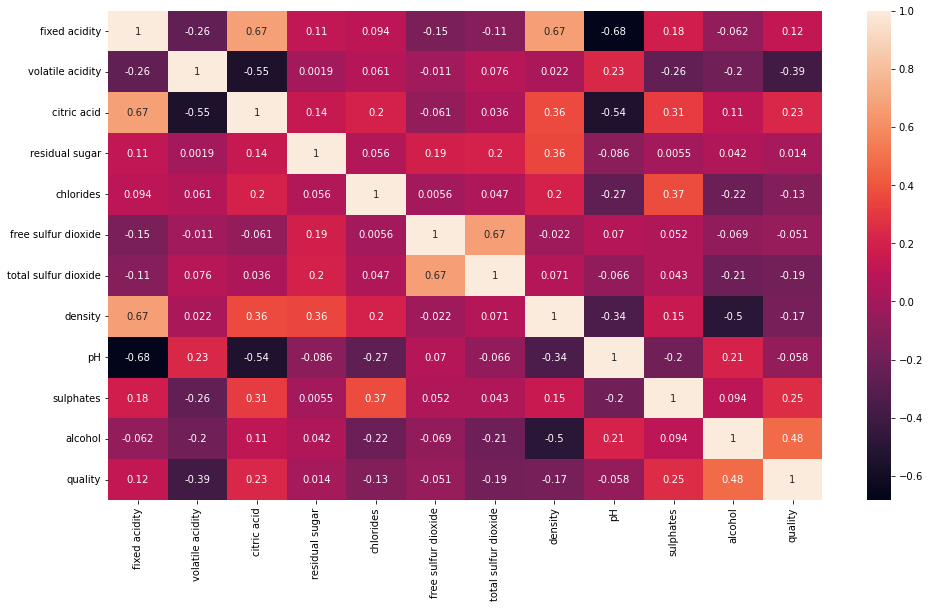

In [4]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [ ]:
#====================================================================

In [7]:
#Không bỏ cột
features = df.drop('quality', axis=1)
labels = df['quality']

In [8]:
features.select_dtypes(exclude=['int64']).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [9]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,fixed acidity_4.6,fixed acidity_4.7,fixed acidity_4.9,fixed acidity_5.0,fixed acidity_5.1,fixed acidity_5.2,fixed acidity_5.3,fixed acidity_5.4,fixed acidity_5.5,fixed acidity_5.6,...,alcohol_13.0,alcohol_13.1,alcohol_13.2,alcohol_13.3,alcohol_13.4,alcohol_13.5,alcohol_13.566666666666698,alcohol_13.6,alcohol_14.0,alcohol_14.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 6. TÁCH CÁC DÒNG DỮ LIỆU THÀNH 2 PHẦN HUẤN LUYỆN VÀ KIỂM THỬ

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [12]:
X_train = features_onehot[:1119]
X_test = features_onehot[1119:]
y_train = labels[:1119]
y_test = labels[1119:]

In [13]:
#7. XÂY DỰNG CÂY HUẤN LUYỆN

In [14]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.4083333333333333
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.22      0.10      0.13        21
           5       0.52      0.53      0.53       188
           6       0.46      0.40      0.43       218
           7       0.07      0.14      0.09        42
           8       1.00      0.17      0.29         6

    accuracy                           0.41       480
   macro avg       0.38      0.22      0.24       480
weighted avg       0.44      0.41      0.42       480



/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.4083333333333333')

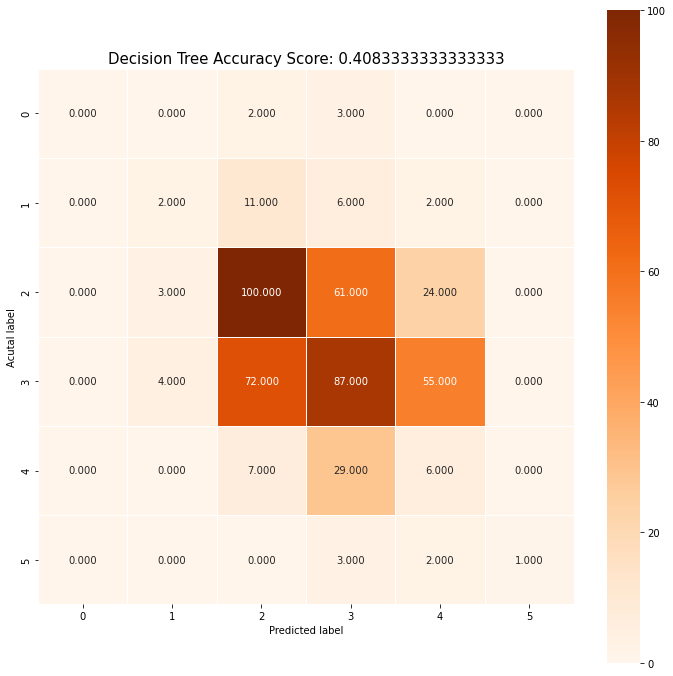

In [18]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Oranges');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

In [ ]:
# ====================================================================

In [19]:
# Bỏ cột
df.drop(columns=['fixed acidity'])
df.drop(columns=['free sulfur dioxide'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
features = df.drop('quality', axis=1)
labels = df['quality']

In [21]:
features.select_dtypes(exclude=['int64']).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [22]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,fixed acidity_4.6,fixed acidity_4.7,fixed acidity_4.9,fixed acidity_5.0,fixed acidity_5.1,fixed acidity_5.2,fixed acidity_5.3,fixed acidity_5.4,fixed acidity_5.5,fixed acidity_5.6,...,alcohol_13.0,alcohol_13.1,alcohol_13.2,alcohol_13.3,alcohol_13.4,alcohol_13.5,alcohol_13.566666666666698,alcohol_13.6,alcohol_14.0,alcohol_14.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train = features_onehot[:1119]
X_test = features_onehot[1119:]
y_train = labels[:1119]
y_test = labels[1119:]

In [24]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
# Predict the response fot test dataset
tree_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.4083333333333333
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.22      0.10      0.13        21
           5       0.52      0.53      0.53       188
           6       0.46      0.40      0.43       218
           7       0.07      0.14      0.09        42
           8       1.00      0.17      0.29         6

    accuracy                           0.41       480
   macro avg       0.38      0.22      0.24       480
weighted avg       0.44      0.41      0.42       480



/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.4083333333333333')

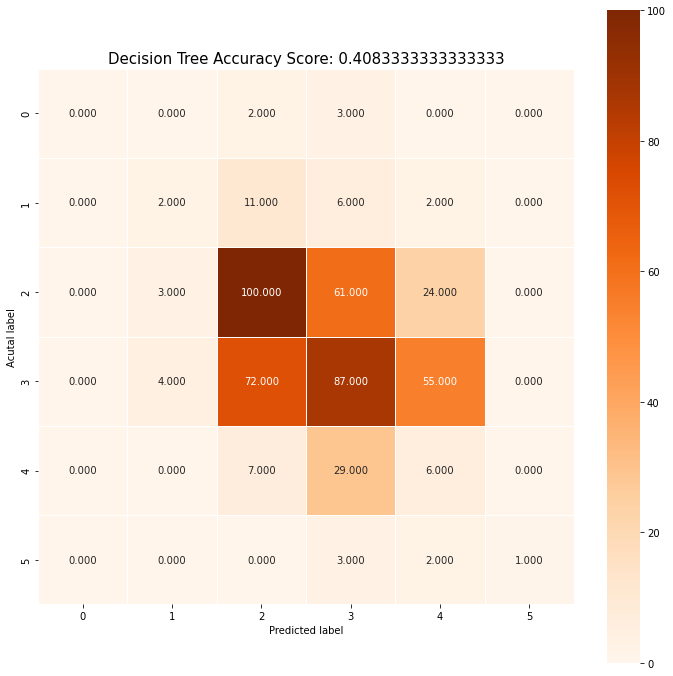

In [27]:
# Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Oranges');
plt.ylabel('Acutal label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)